In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, class_likelihood_ratios, classification_report
from gerarDS import  generate_mixed_dataset

In [2]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)

In [ ]:
# generate_mixed_dataset(n_samples, n_features, n_categorical, n_ordinal, n_integer, n_classes, class_balance=None, noise=0.0,  dataset_type='linear', random_state=42)

dataset = generate_mixed_dataset(1000, 2, 0, 0, 0, 2, class_balance=None, noise=0.0,  dataset_type='nonlinear', random_state=42)

# Logistic Regression

Logistic Regression Accuracy: 0.83
LDA Accuracy: 0.72


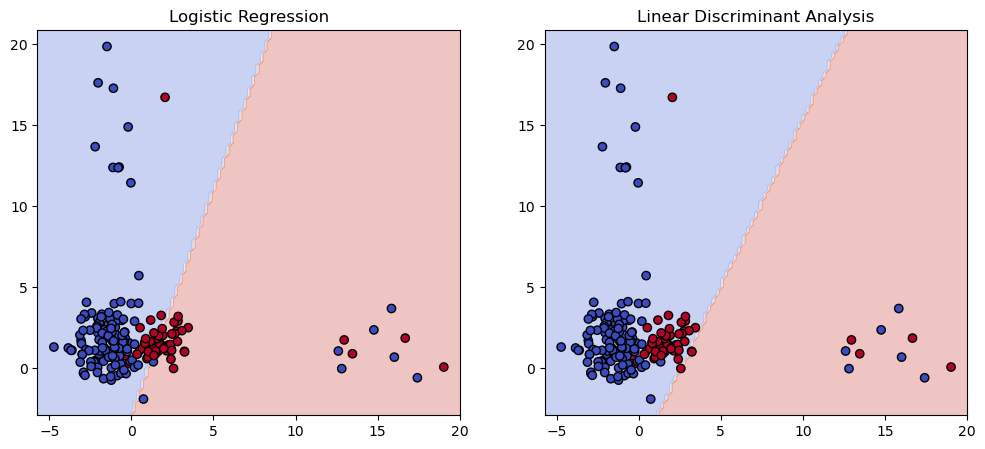

In [21]:
X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_classes=2,  
                           n_informative=2, 
                           n_redundant=0,  
                           n_clusters_per_class=1,
                           random_state=42,
                           class_sep=1.5,
                           weights=[0.7, 0.3]) 

dataset = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
dataset.columns = ["Feature 1", "Feature 2", "Class"]

np.random.seed(52)
outlier_indices = np.random.choice(dataset.index, size=10, replace=False)
dataset.loc[outlier_indices, "Feature 1"] = np.random.uniform(low=10, high=20, size=10)

np.random.seed(42)
outlier_indices = np.random.choice(dataset.index, size=10, replace=False)
dataset.loc[outlier_indices, "Feature 2"] = np.random.uniform(low=10, high=20, size=10)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg = LogisticRegression(solver="lbfgs")
lda = LinearDiscriminantAnalysis()

log_reg.fit(X_train, y_train)
lda.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_lda = lda.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"LDA Accuracy: {acc_lda:.2f}")


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,2,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.show()


Logistic Regression Accuracy: 0.86
LDA Accuracy: 0.88


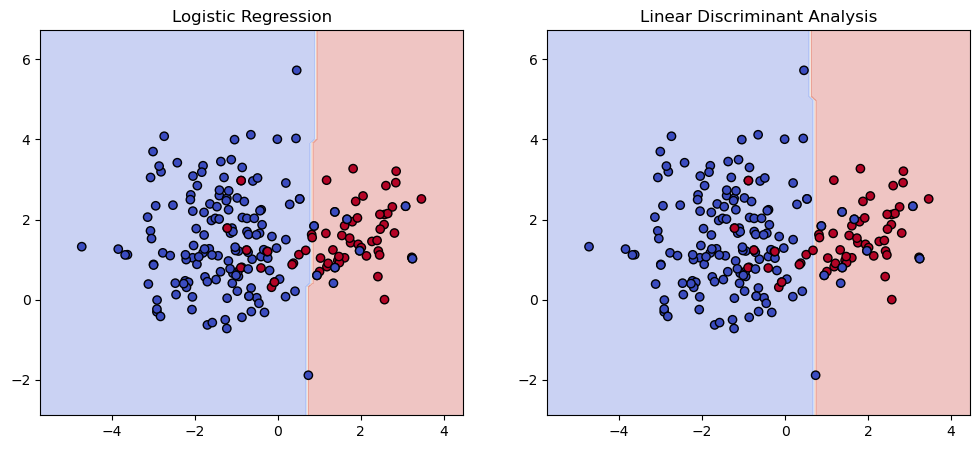

In [9]:

X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_classes=2,  
                           n_informative=2, 
                           n_redundant=0,  
                           n_clusters_per_class=1,
                           random_state=42,
                           class_sep=1.5,
                           weights=[0.7, 0.3]) 

dataset = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
dataset.columns = ["Feature 1", "Feature 2", "Class"]


outliers = dataset[dataset["Class"] == 0].sample(5, random_state=42)
outliers["Class"] = 1

outliers2 = dataset[dataset["Class"] == 1].sample(10, random_state=32)
outliers2["Class"] = 0

dataset = pd.concat([dataset, outliers2, outliers], ignore_index=True)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg = LogisticRegression(solver="lbfgs")
lda = LinearDiscriminantAnalysis()

log_reg.fit(X_train, y_train)
lda.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_lda = lda.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lda = accuracy_score(y_test, y_pred_lda)

print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"LDA Accuracy: {acc_lda:.2f}")


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(log_reg, X, y, "Logistic Regression")

plt.subplot(1,2,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.show()


# LDA

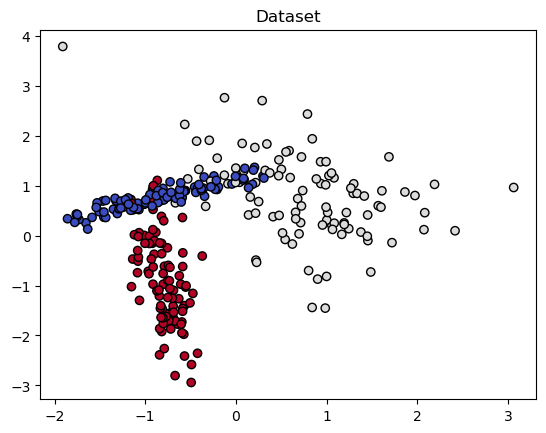

LDA Accuracy: 
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.87      0.87      0.87        38
           2       1.00      0.72      0.84        25

    accuracy                           0.81        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.84      0.81      0.82        90

QDA Accuracy: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.94      0.89      0.92        38
           2       1.00      0.84      0.91        25

    accuracy                           0.89        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.90      0.89      0.89        90



In [ ]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_classes=3,
                           n_redundant=0, n_clusters_per_class=1, class_sep=0.8, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot Data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Dataset")
plt.show()

# Train LDA and QDA
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)

# Accuracy Scores
acc_lda = classification_report(y_test, y_pred_lda)
acc_qda = classification_report(y_test, y_pred_qda)

print(f"LDA Accuracy: \n{acc_lda}")
print(f"QDA Accuracy: \n{acc_qda}")


# Plot the decision boundary



# QDA

LDA Accuracy: 
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        29
           1       0.57      0.39      0.46        31

    accuracy                           0.53        60
   macro avg       0.54      0.54      0.52        60
weighted avg       0.54      0.53      0.52        60

QDA Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



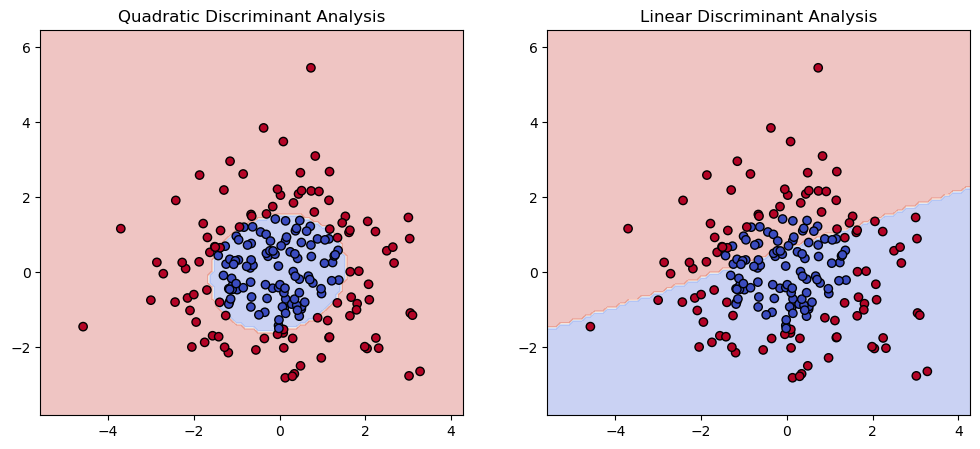

In [3]:
# Generate data
X, y = make_gaussian_quantiles(mean=(0, 0), cov=2.0, n_samples=200, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train LDA and QDA
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)

# Accuracy Scores
acc_lda = classification_report(y_test, y_pred_lda)
acc_qda = classification_report(y_test, y_pred_qda)

print(f"LDA Accuracy: \n{acc_lda}")
print(f"QDA Accuracy: \n{acc_qda}")


def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(qda, X, y, "Quadratic Discriminant Analysis")

plt.subplot(1,2,2)
plot_decision_boundary(lda, X, y, "Linear Discriminant Analysis")

plt.show()

